# Set Working Directory and List

In [1]:
# Set working directory
import os
os.chdir('C:/Users/Sven Konermann/Documents/Master/2_Semester/Applied_Data_Science/Gruppe')
#os.chdir('C:/Users/manue/OneDrive - ZHAW/MSc Wirtschaftsinformatik/2. Semester/Applied Data Science/ADS Projekt')
# Warnings settings
import warnings
warnings.filterwarnings("ignore")

In [5]:
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

In [2]:
# List with URLS for Webscraping part 1
url_1_raw = "URL_1.txt"
url_1 = [line.rstrip('\n') for line in open(url_1_raw)]
url_1[:5]

['https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=20735&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=193736&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=324977&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=1555183&dateStart=01.05.',
 'https://www.onvista.de/onvista/times+sales/popup/historische-kurse/?notationId=3193857&dateStart=01.05.']

In [3]:
# List with URLS for Webscraping part 2
url_2_raw = "URL_2.txt"
url_2 = [line.rstrip('\n') for line in open(url_2_raw)]
url_2[:5]

['&interval=Y5&assetName=DAX&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=EURO STOXX 50&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=Dow Jones&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=SMI&exchange=auÃŸerbÃ¶rslich',
 '&interval=Y5&assetName=MSCI WORLD &exchange=auÃŸerbÃ¶rslich']

## Get Data with automated Scraping (Onvista)

In [11]:
from selenium import webdriver
#from selenium.webdriver.chrome.options import Options
from selenium.webdriver.firefox.options import Options
import random

opts = Options()
opts.add_argument("--headless")
#opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
#driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)
driver = webdriver.Chrome(executable_path='geckodriver.exe', options=opts)

#Websites to Scrape
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]

#IndexListe= ["DAX"]

# Daten in csv Datei schreiben
import pandas as pd
import csv



#Scraping Loop
x=0
while x < len(url_1):
    Text=""
    Jahr=2002
    while Jahr <=2017:
        URL = str(url_1[x])+str(Jahr)+str(url_2[x])
        driver.get(URL)
        text1 = driver.find_element_by_css_selector('body > div.INHALT.WEBSEITE > article > table > tbody').text
        Text= Text + '\n' + text1
        templist = []
        Table_dict={ 'Gescrapte Finanzdaten': Text}
        templist.append(Table_dict)
        df = pd.DataFrame(templist)
        df.to_csv(IndexListe[x]+".csv")
        Jahr+=5
    x+=1
    
    



# Examples using tag name
#text = driver.find_element_by_xpath('/html/body/div[1]/article').text

# Further examples (find out by yourself)
# text = driver.find_element_by_name('').text
# text = driver.find_element_by_tag_name('').text
# text = driver.find_element_by_id('').text

## Data Cleansing and Preparation onvista

In [26]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline
IndexListe= ["DAX", "EURO STOXX 50", "Dow Jones",  "SMI", "MSCI World", "FTSE", "ATX", "SDAX", "Tec DAX", "NASDAQ 100", "Nikkei", "Hang Seng", "SHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
Indexdf= ["dfDAX", "dfEURO STOXX 50", "dfDow Jones",  "dfSMI", "dfMSCI World", "dfFTSE", "dfATX", "dfSDAX", "dfTec DAX", "dfNASDAQ 100", "dfNikkei", "dfHang Song", "dfSHANGHAI STOCK EXCHANGE B SHARES", "Emerging Markets", "Bovespa"]
x=0
j=0
while x < len(IndexListe):
    Indexdf[x]= pd.read_csv(IndexListe[x]+".csv", delimiter=' ', header=None, skiprows=2, names=['Datum','Eröffnung','Hoch','Tief','Schluss '+ IndexListe[x],'Volumen'], index_col=False)
    Indexdf[x]=pd.DataFrame(Indexdf[x])
    Indexdf[x].drop(columns=['Eröffnung','Hoch','Tief','Volumen'], inplace=True)
    x+=1

x=1
result=Indexdf[0]
while x < len(IndexListe):
    result=pd.merge(result, Indexdf[x], how="inner", on="Datum")
    x+=1
    
x=0
while x < len(IndexListe):
    for i in range (len(result)):
        result.loc[i,'Schluss '+ IndexListe[x]] = result.loc[i,'Schluss '+ IndexListe[x]].replace('.','')
        result.loc[i,'Schluss '+ IndexListe[x]] = result.loc[i,'Schluss '+ IndexListe[x]].replace(',','.')
        i+=1
    x+=1

result.to_csv("Indizes.csv")    
result

#df
#result=pd.concat([Indexdf[0], Indexdf[1]], axis=1)
#result=Indexdf[0].append([Indexdf[1], Indexdf[2], Indexdf[3], Indexdf[4], Indexdf[5], Indexdf[6], Indexdf[7], Indexdf[8], Indexdf[9], Indexdf[10], Indexdf[11], Indexdf[12]])

#result = result.dropna()
# Show the content of the dataframe:


,Datum,Schluss DAX,Schluss EURO STOXX 50,Schluss Dow Jones,Schluss SMI,Schluss MSCI World,Schluss FTSE,Schluss ATX,Schluss SDAX,Schluss Tec DAX,Schluss NASDAQ 100,Schluss Nikkei,Schluss Hang Seng,Schluss SHANGHAI STOCK EXCHANGE B SHARES,Schluss Emerging Markets,Schluss Bovespa
0,24.03.2003,2548.370,2124.780,8214.600,4230.700,764.795,3743.300,1157.180,1700.340,337.780,1047.100,8435.070,9108.450,120.800,279.256,11052.000
1,25.03.2003,2636.100,2184.980,8280.200,4263.600,771.798,3762.000,1159.880,1712.510,344.770,1066.570,8238.760,9062.150,119.090,277.982,11248.000
2,26.03.2003,2579.330,2172.640,8229.800,4247.100,770.102,3793.100,1171.040,1717.300,346.330,1066.300,8351.920,9047.090,118.060,278.743,11206.000
3,27.03.2003,2584.050,2132.510,8201.400,4194.500,766.602,3729.100,1166.620,1703.450,340.550,1061.930,8368.670,8872.320,122.610,277.431,11233.000
4,28.03.2003,2520.840,2132.110,8145.700,4207.600,762.954,3708.500,1162.820,1697.900,338.760,1046.720,8280.160,8848.260,121.650,277.317,11396.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,22.04.2022,14142.090,3840.010,33811.400,12258.330,2882.453,7521.680,3295.160,14225.230,3172.620,13356.869,27105.260,20616.810,288.973,1075.598,111077.510
3773,25.04.2022,13924.170,3757.590,34049.460,12084.980,2877.705,7380.540,3227.020,13882.570,3146.530,13533.224,26590.780,19876.880,278.236,1046.043,110684.950
3774,26.04.2022,13756.400,3721.360,33240.180,11933.280,2810.996,7386.190,3194.050,13706.510,3079.530,13009.712,26700.110,19898.740,275.658,1049.394,108212.860
3775,27.04.2022,13793.940,3734.640,33301.930,12051.480,2807.510,7425.610,3232.270,13684.570,3091.050,13003.356,26386.630,19972.840,283.198,1043.744,109349.370


## Get Data with API (Yahoo-Finance)

In [236]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance
#!pip install requests
#!pip install cryptowatch
#!pip install cryptowatch-sdk

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
tickers_list= ['PL=F','GC=F', 'CL=F', 'SI=F', 'ZW=F']
data = yf.download(tickers_list, '2002-1-1')['Adj Close']
print(data['PL=F'])



[*********************100%***********************]  5 of 5 completed
Date
2001-12-31     493.000000
2002-01-02     483.500000
2002-01-03     485.500000
2002-01-04     478.200012
2002-01-07     476.299988
                 ...     
2022-05-31     969.299988
2022-06-01     997.200012
2022-06-02    1029.199951
2022-06-03    1017.200012
2022-06-06    1022.599976
Name: PL=F, Length: 5146, dtype: float64


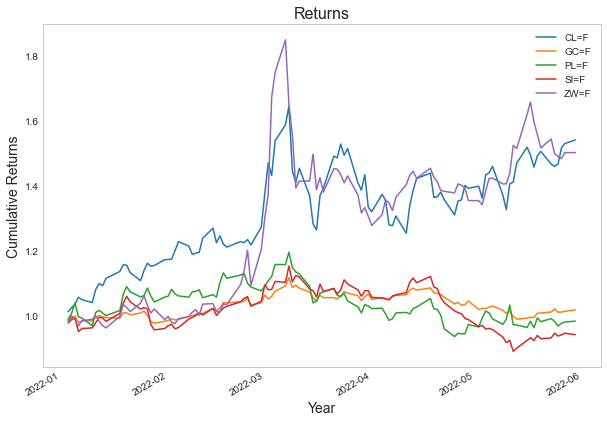

In [238]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

## Get Data with API (Cryptowatch)

In [ ]:
#!pip install pathlib
#!pip install ruamel-yaml
#!pip install yfinance

In [285]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotheksimport zur Warnungssteuerung
import warnings
warnings.filterwarnings("ignore")
#Instalacion e importacion de libreria de Cryptowatch
import logging
import cryptowatch as cw
#API-SCHLÜSSEL erforderlich, um die Cryptowatch-Bibliothek zu verwenden
cw.api_key = "BM0DRS9QDJ4W7JCL76PD"

logging.basicConfig()
logging.getLogger("cryptowatch").setLevel(logging.WARNING)

cw.exchanges.list()

#Wählen Sie Exchange und CryptoActive zur Analyse aus


##Sehen Sie sich die verschiedenen Cryptoactives an, die in der ausgewählten Börse verfügbar sind
#list = []
#selected = cw.markets.list(MARKET)
#for market in selected.markets:
#    list.append(market.pair)
#df_list = pd.DataFrame (list, columns = ['Währung'])
#print(df_list)

#Wir wählen das Ticket (Paar der ausgewählten Kryptoaktiven) aus, von dem wir alle seine Daten erhalten möchten
#candles = cw.markets.get(MARKET+":"+TICKET, ohlc=True, periods=["1m","15m","4h", "1h", "1d", "1w"])
MARKET ="BINANCE"
IndexTICKET=["etheur"]
Indexdf=["dfetheur"]

y=0

#while y < len(IndexTICKET):
candles = cw.markets.get(MARKET+":"+IndexTICKET[y], ohlc=True, periods=["1d"])

    # Wir generieren den Datenrahmen mit den Daten
rows_list = []
for x in candles.of_1d:
    close_ts = datetime.fromtimestamp(x[0])
    close_value = x[1]
    rows_list.append([IndexTICKET[y],close_ts , close_value])
Indexdf[y] = pd.DataFrame(rows_list,columns = ["ticket","close_ts" , IndexTICKET[y] +" close_value"])
Indexdf[y].drop(columns="ticket", inplace=True )

result=Indexdf[0]

#x=1
#result=Indexdf[0]
#while x < len(IndexListe):
    #result=pd.merge(result, Indexdf[x], how="inner", on="close_ts")
    #x+=1


#df = pd.DataFrame(rows_list,columns = ["ticket", "open_value"])
result.to_csv('CryptoIndizes.csv', index=False)
df2 = pd.read_csv("CryptoIndizes.csv")
print(df2)

                close_ts  etheur close_value
0    2020-01-04 01:00:00              113.80
1    2020-01-05 01:00:00              120.00
2    2020-01-06 01:00:00              120.39
3    2020-01-07 01:00:00              121.20
4    2020-01-08 01:00:00              128.86
..                   ...                 ...
874  2022-05-27 02:00:00             1817.20
875  2022-05-28 02:00:00             1668.65
876  2022-05-29 02:00:00             1608.71
877  2022-05-30 02:00:00             1671.07
878  2022-05-31 02:00:00             1690.19

[879 rows x 2 columns]
